In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from collections import Counter

In [2]:
# Load data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

<IPython.core.display.Javascript object>


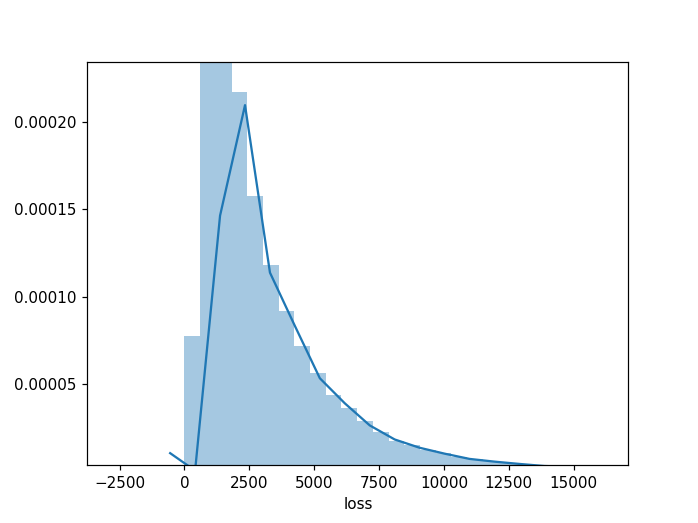

In [5]:
%matplotlib notebook
sns.distplot(df_train['loss'], bins=200)

In [55]:
# Check to see which variables have more contribution in loss distribution plot
df_train_trim = df_train[df_train['loss']< 7500]

In [43]:
# List of unique variables in each column
def unique_variables(df, label):
    cat_col = df.select_dtypes(include = ['object', 'bool']).columns.tolist()
    #print('Number of Categorical columns: {}'.format(len(cat_col)))


    cat_list = []
    for column in cat_col:
        cat_list.append(len(df[column].unique().tolist()))
        
    # Distinct categories in the training dataset
    A = list(Counter(cat_list).keys())
    # Number of columns for a given number of category 
    B = list(Counter(cat_list).values())
    
    df_cat = pd.DataFrame([])
    df_cat['No. Variables ' + label] = A
    df_cat['No. Columns ' + label ] = B
    df_cat.sort_values(by = 'No. Variables ' + label, inplace = True)
    
        
    return df_cat

In [44]:
df_cat_train_trim = unique_variables(df_train_trim, 'train')
df_cat_train_no_trim = unique_variables(df_train, 'train, no trim')

In [54]:
df_cat_all =  pd.concat([df_cat_train_no_trim, df_cat_train_trim], axis=1, sort = False)
df_cat_all.sort_values(by = 'No. Variables train, no trim', inplace = True)
df_cat_all['difference'] = df_cat_all['No. Columns train, no trim'] - df_cat_all['No. Columns train']
df_cat_all

,"No. Variables train, no trim","No. Columns train, no trim",No. Variables train,No. Columns train,difference
0,2,72,2,72,0
1,3,4,3,4,0
2,4,12,4,12,0
5,5,3,5,3,0
4,7,4,8,2,2
3,8,3,7,6,-3
9,9,1,13,1,0
13,11,1,11,1,0
10,13,1,17,2,-1
7,15,1,15,1,0


In [127]:
cat_list = df_cat_all['No. Variables train, no trim'].tolist()
cat_list

[2, 3, 4, 5, 7, 8, 9, 11, 13, 15, 16, 17, 19, 20, 23, 51, 61, 84, 131, 326]

In [128]:
# Lets have a look at the column with 326 variables
# It may show which of its variable has more contribution in the loss

# first which column has 84, 131 and 326 variables

# Find categorical features with N vaiable in training dataset
def col_type_list(dataset, col_type_list):
    col_list = dataset.select_dtypes(include = col_type_list).columns
    #print(dataset.select_dtypes(include = col_type_list).shape)
    return col_list


def cat_uniq_list(dataset, label, N):
    
    column_obj = col_type_list(dataset, ['object', 'bool'])
    cat_uniq = dataset[column_obj].nunique()
    name = 'cat_{}_feat_'.format(N) + label
    uniq_list = cat_uniq[cat_uniq == N].index
    return{name: uniq_list}

dic = {}        
for i in cat_list:       
    dic.update(cat_uniq_list(df_train, 'train', i))
    #dic.update(cat_uniq_list(df_test, 'test', i))
dic

{'cat_2_feat_train': Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
        'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17',
        'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25',
        'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33',
        'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41',
        'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
        'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57',
        'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65',
        'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72'],
       dtype='object'),
 'cat_3_feat_train': Index(['cat73', 'cat74', 'cat75', 'cat76'], dtype='object'),
 'cat_4_feat_train': Index(['cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
        'cat85', 'cat86', 'cat87', 'cat88'],
       dtype='obj

In [74]:
dic['cat_2_feat_train'].tolist()[:25]

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25']

<IPython.core.display.Javascript object>


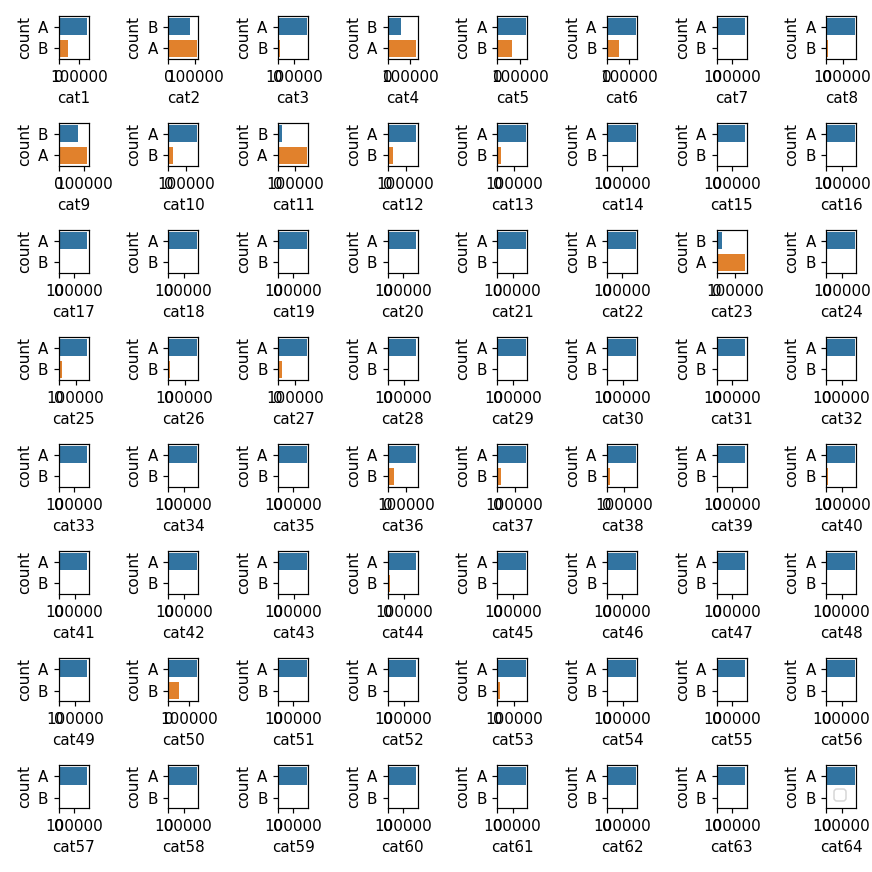

No handles with labels found to put in legend.


In [202]:
# Let's have a broad picture of first 64 categorical columns with 2 variables
%matplotlib notebook
plt.figure(figsize=(8, 8))
col = dic['cat_2_feat_train'].tolist()[:64]
for i in range(64):
    plt.subplot(8, 8, i + 1)
    sns.countplot(y = col[i], data = df_train)                
    plt.xlabel(col[i])
    plt.ylabel('count')
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


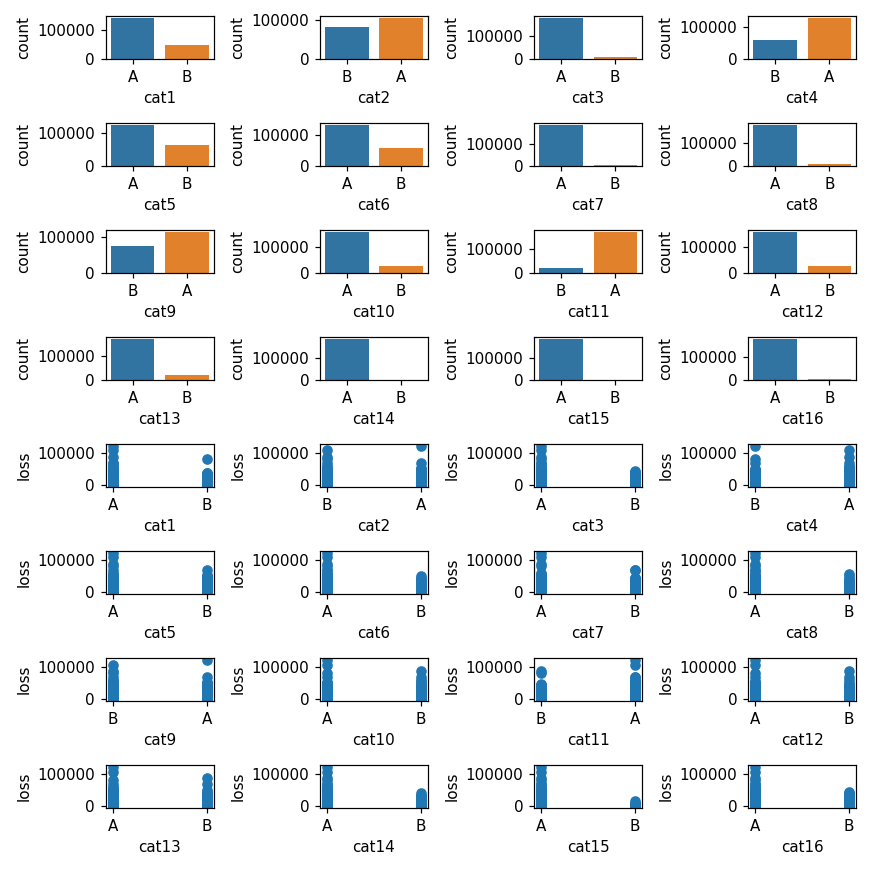

In [201]:
# Now let's have a closer look at a batch of 16 (1-16)
# Count plot and scatter plot
%matplotlib notebook
plt.figure(figsize=(8,8))
label = 'cat_{}_feat_train'.format(2)
row, column = 4, 4 
col = dic[label].tolist()[:16]
for i in range(len(col)):
    plt.subplot(2*row, column, i + 1)
    sns.countplot(x = col[i], data = df_train)                
    plt.xlabel(col[i])
    plt.ylabel('count')
    plt.subplot(2*row, column, len(col) + i + 1)
    plt.scatter(df_train[col[i]], df_train['loss'])
    plt.xlabel(col[i])
    plt.ylabel('loss')
plt.tight_layout()

<IPython.core.display.Javascript object>


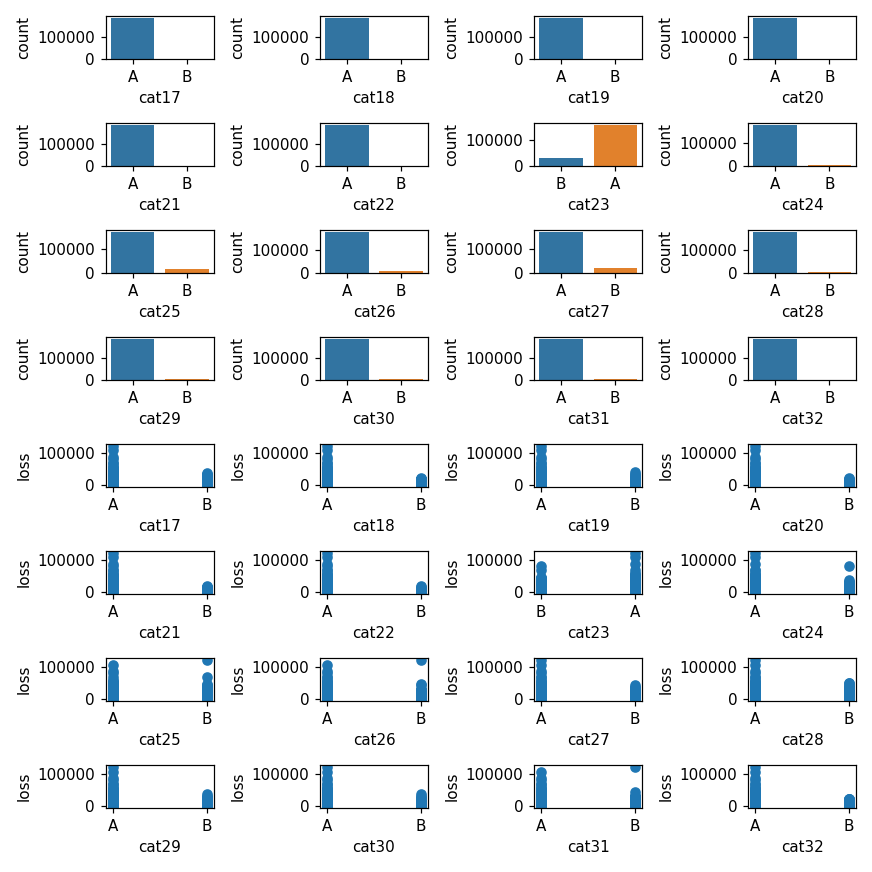

In [204]:
# Now let's have a closer look at a batch of 16 (16-32)
# Count plot and scatter plot
%matplotlib notebook
plt.figure(figsize=(8,8))
label = 'cat_{}_feat_train'.format(2)
row, column = 4, 4 
col = dic[label].tolist()[16:32]
for i in range(len(col)):
    plt.subplot(2*row, column, i + 1)
    sns.countplot(x = col[i], data = df_train)                
    plt.xlabel(col[i])
    plt.ylabel('count')
    plt.subplot(2*row, column, len(col) + i + 1)
    plt.scatter(df_train[col[i]], df_train['loss'])
    plt.xlabel(col[i])
    plt.ylabel('loss')
plt.tight_layout()

<IPython.core.display.Javascript object>


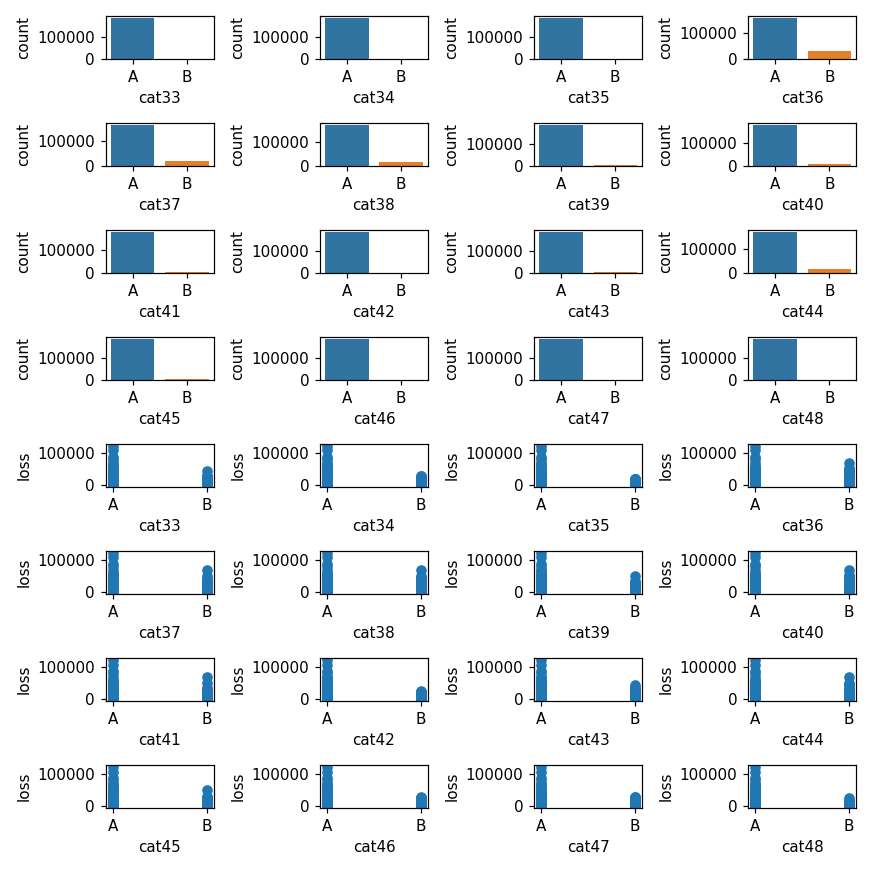

In [205]:
# Now let's have a closer look at a batch of 16 (32-48)
# Count plot and scatter plot
%matplotlib notebook
plt.figure(figsize=(8,8))
label = 'cat_{}_feat_train'.format(2)
row, column = 4, 4 
col = dic[label].tolist()[32:48]
for i in range(len(col)):
    plt.subplot(2*row, column, i + 1)
    sns.countplot(x = col[i], data = df_train)                
    plt.xlabel(col[i])
    plt.ylabel('count')
    plt.subplot(2*row, column, len(col) + i + 1)
    plt.scatter(df_train[col[i]], df_train['loss'])
    plt.xlabel(col[i])
    plt.ylabel('loss')
plt.tight_layout()

<IPython.core.display.Javascript object>


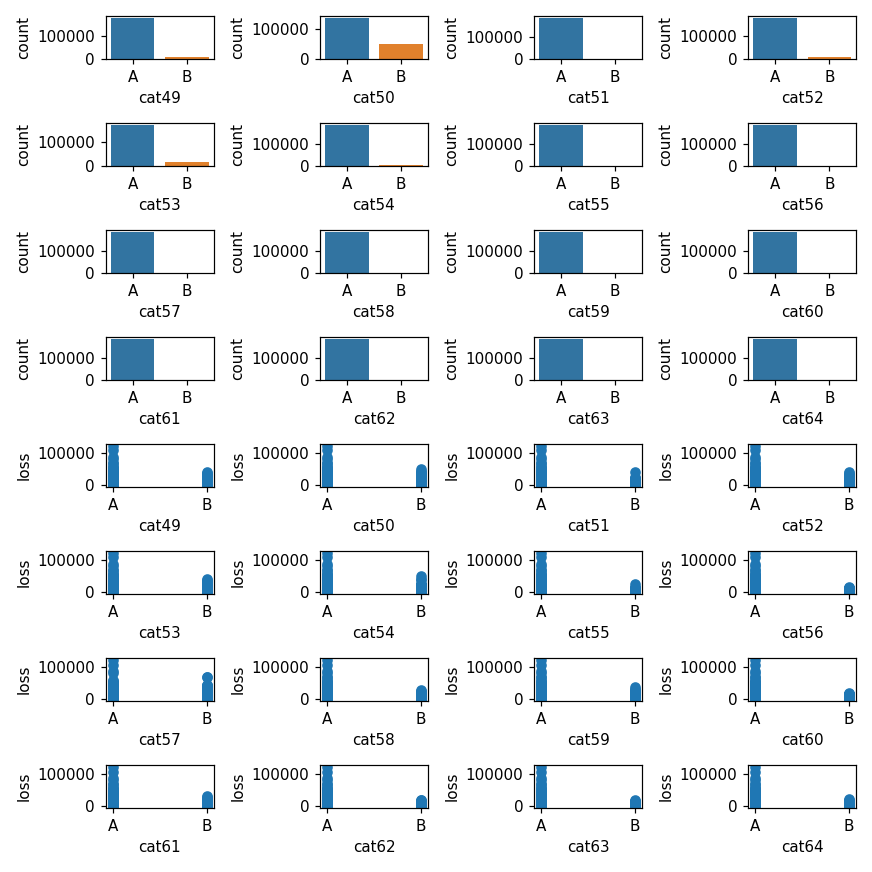

In [206]:
# Now let's have a closer look at a batch of 16 (48-64)
# Count plot and scatter plot
%matplotlib notebook
plt.figure(figsize=(8,8))
label = 'cat_{}_feat_train'.format(2)
row, column = 4, 4 
col = dic[label].tolist()[48:64]
for i in range(len(col)):
    plt.subplot(2*row, column, i + 1)
    sns.countplot(x = col[i], data = df_train)                
    plt.xlabel(col[i])
    plt.ylabel('count')
    plt.subplot(2*row, column, len(col) + i + 1)
    plt.scatter(df_train[col[i]], df_train['loss'])
    plt.xlabel(col[i])
    plt.ylabel('loss')
plt.tight_layout()

<IPython.core.display.Javascript object>


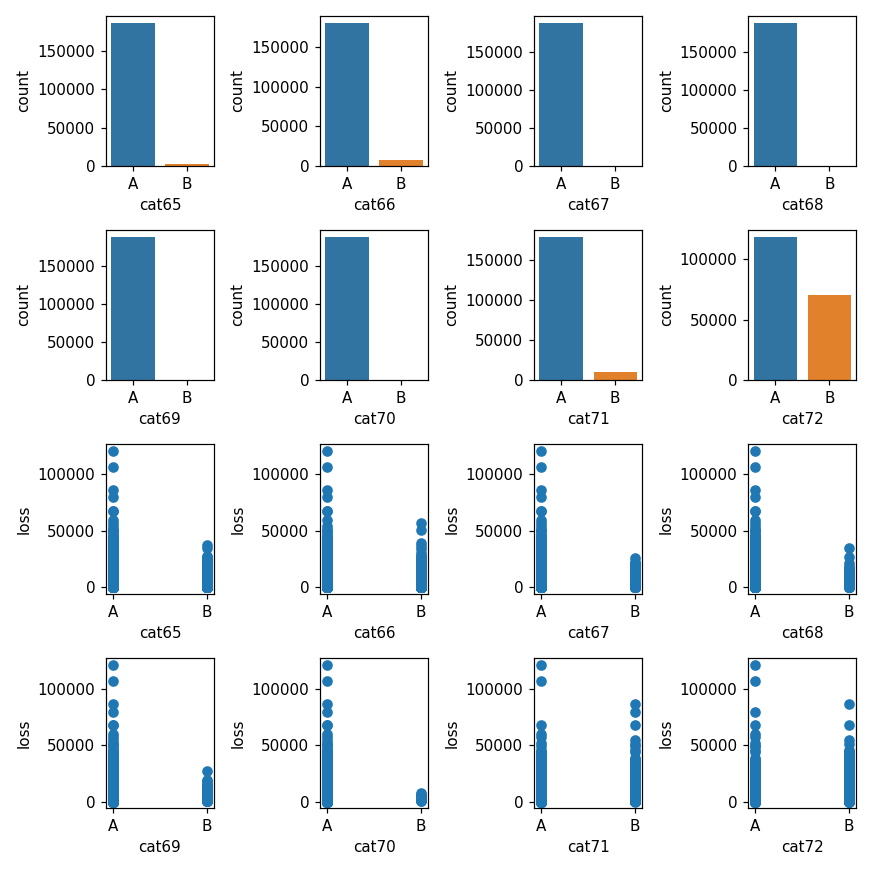

In [207]:
# Now let's have a closer look at a batch of 16 (64-72)
# Count plot and scatter plot
%matplotlib notebook
plt.figure(figsize=(8,8))
label = 'cat_{}_feat_train'.format(2)
row, column = 2, 4 
col = dic[label].tolist()[64:72]
for i in range(len(col)):
    plt.subplot(2*row, column, i + 1)
    sns.countplot(x = col[i], data = df_train)                
    plt.xlabel(col[i])
    plt.ylabel('count')
    plt.subplot(2*row, column, len(col) + i + 1)
    plt.scatter(df_train[col[i]], df_train['loss'])
    plt.xlabel(col[i])
    plt.ylabel('loss')
plt.tight_layout()

In [78]:
# We see that many of features with two variables are looking like a single variable!

In [104]:
# get the most frequent values of categorical columns with two variables
freq_list = []
ignore_cols = []
for i in dic['cat_2_feat_train'].tolist():
    percent = df_train[i].value_counts()[0]/df_train.shape[0] * 100
    if percent > 98:
        ignore_cols.append(i)
    freq_list.append(percent)

<IPython.core.display.Javascript object>


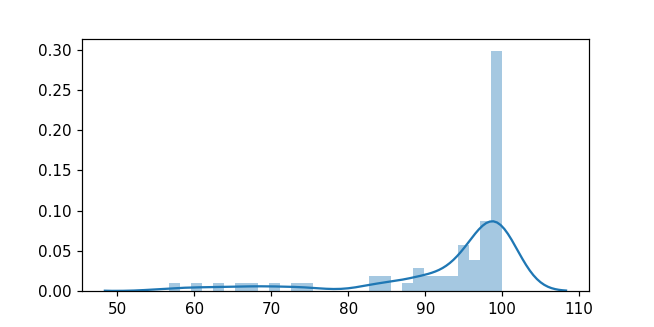

In [105]:
# From this plot we see that many 2-variable columns are 
# mainly occupided by a single variable
%matplotlib notebook
plt.figure(figsize=(6,3))
sns.distplot(freq_list, bins = 30)

Here is the list of the 2-variable categorical columns that  more than 98% of the column is just a single variable:

In [107]:
ignore_cols

['cat14',
 'cat15',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat29',
 'cat30',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat42',
 'cat46',
 'cat47',
 'cat48',
 'cat51',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat67',
 'cat68',
 'cat69',
 'cat70']

So, I will remove these columns from model training.

In [184]:
# To show countplot and scatter plot of categorical variables 
# For single row of each type (count and scatter)
def plot_count_scatter_sr(num_cat):
    %matplotlib notebook
    plt.figure(figsize=(8, 4))
    label = 'cat_{}_feat_train'.format(num_cat)
    col = dic[label].tolist()
    for i in range(len(col)):
        plt.subplot(2, len(col), i + 1)
        sns.countplot(x = col[i], data = df_train)                
        plt.xlabel(col[i])
        plt.ylabel('count')
        plt.subplot(2, len(col), len(col) + i + 1)
        plt.scatter(df_train[col[i]], df_train['loss'])
        plt.xlabel(col[i])
        plt.ylabel('loss')
    plt.tight_layout()
    
# To show countplot and scatter plot of categorical variables 
# For multi-rows of each type (count and scatter)
def plot_count_scatter_mr(row, column, num_cat, figsize):
    %matplotlib notebook
    plt.figure(figsize=figsize)
    label = 'cat_{}_feat_train'.format(num_cat)
    col = dic[label].tolist()
    for i in range(len(col)):
        plt.subplot(2*row, column, i + 1)
        sns.countplot(x = col[i], data = df_train)                
        plt.xlabel(col[i])
        plt.ylabel('count')
        plt.subplot(2*row, column, len(col) + i + 1)
        plt.scatter(df_train[col[i]], df_train['loss'])
        plt.xlabel(col[i])
        plt.ylabel('loss')
    plt.tight_layout()

<IPython.core.display.Javascript object>


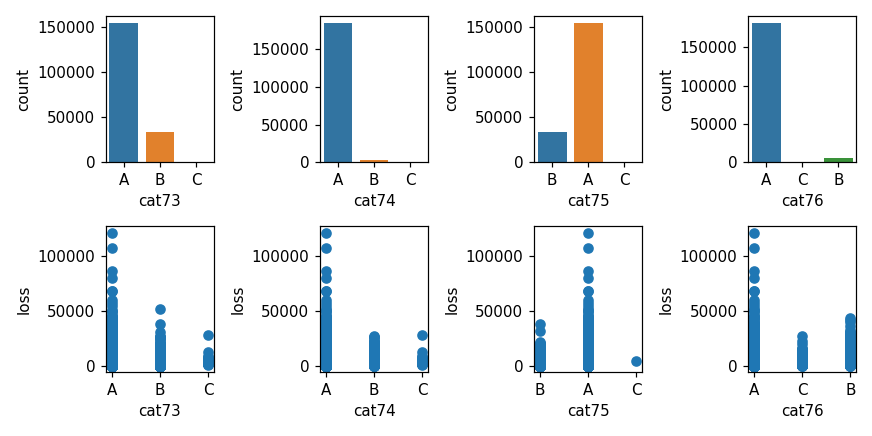

In [185]:
plot_count_scatter_sr(3)

<IPython.core.display.Javascript object>


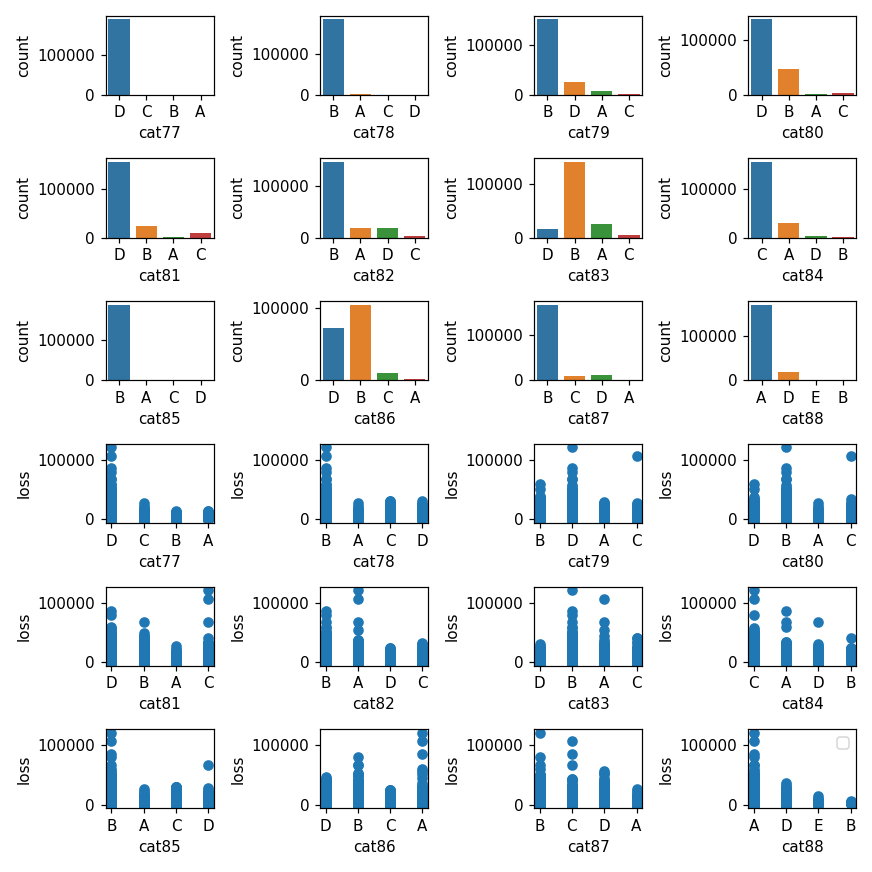

No handles with labels found to put in legend.


In [180]:
plot_count_scatter_mr(3, 4, 4, (8, 8))

<IPython.core.display.Javascript object>


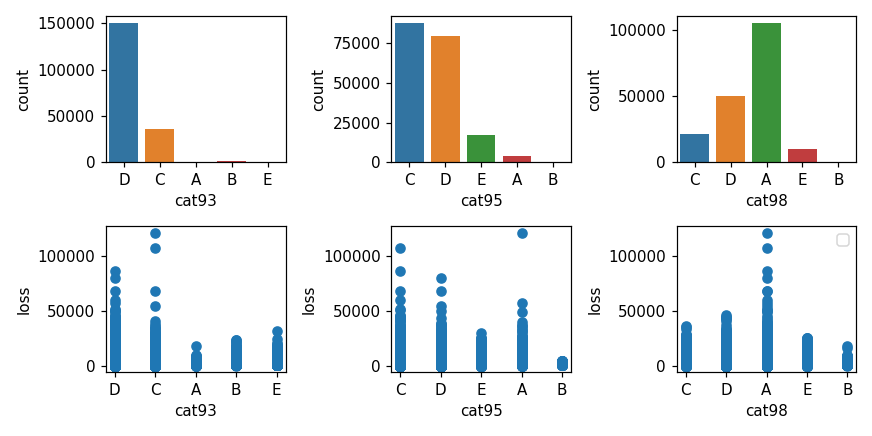

No handles with labels found to put in legend.


In [181]:
plot_count_scatter_sr(5)

<IPython.core.display.Javascript object>


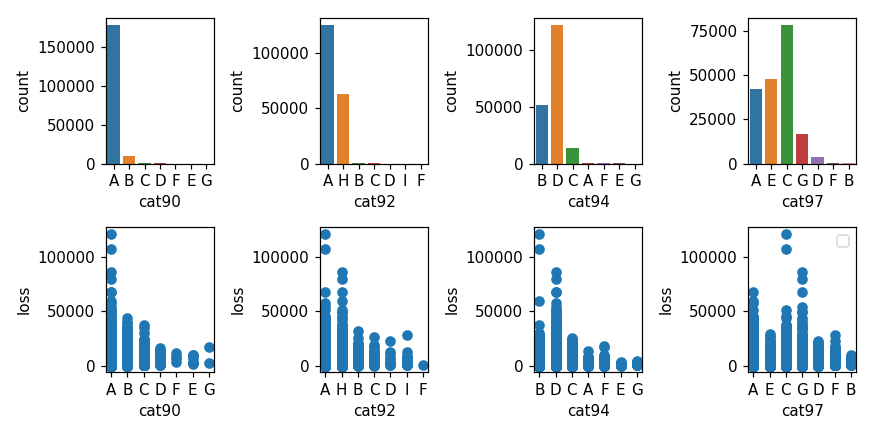

No handles with labels found to put in legend.


In [182]:
plot_count_scatter_sr(7)

<IPython.core.display.Javascript object>


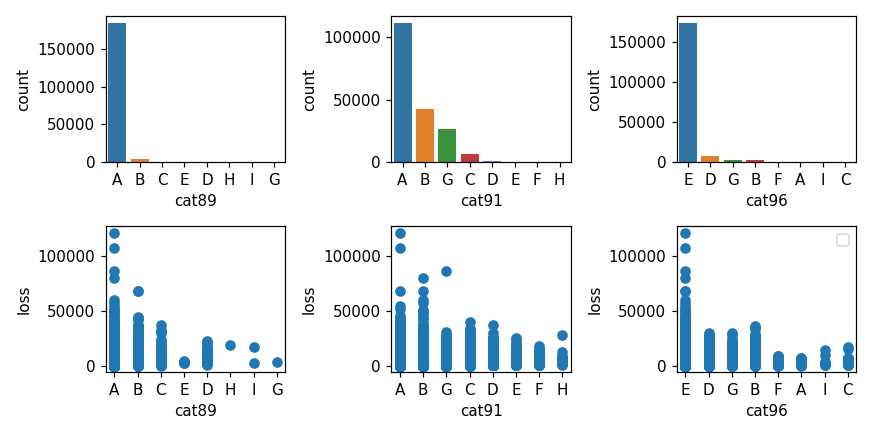

No handles with labels found to put in legend.


In [183]:
plot_count_scatter_sr(8)

<IPython.core.display.Javascript object>


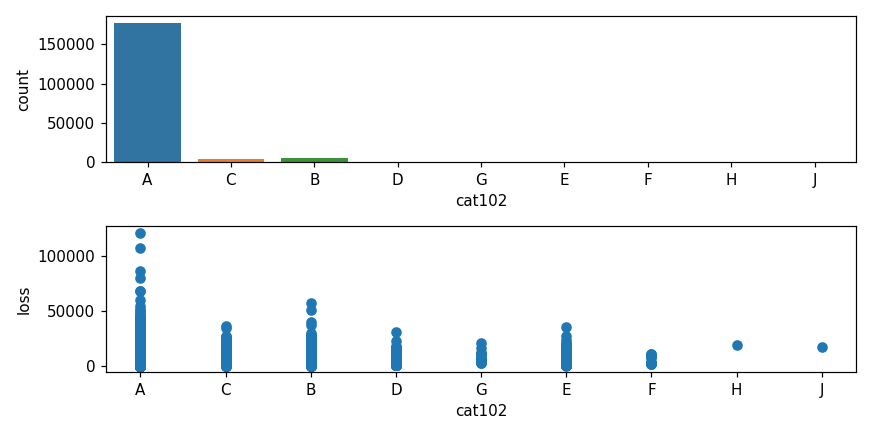

In [186]:
plot_count_scatter_sr(9)

<IPython.core.display.Javascript object>


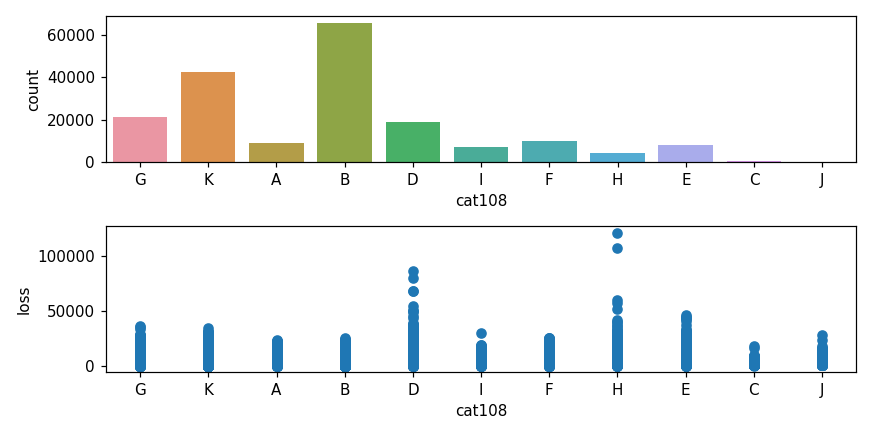

In [187]:
plot_count_scatter_sr(11)

<IPython.core.display.Javascript object>


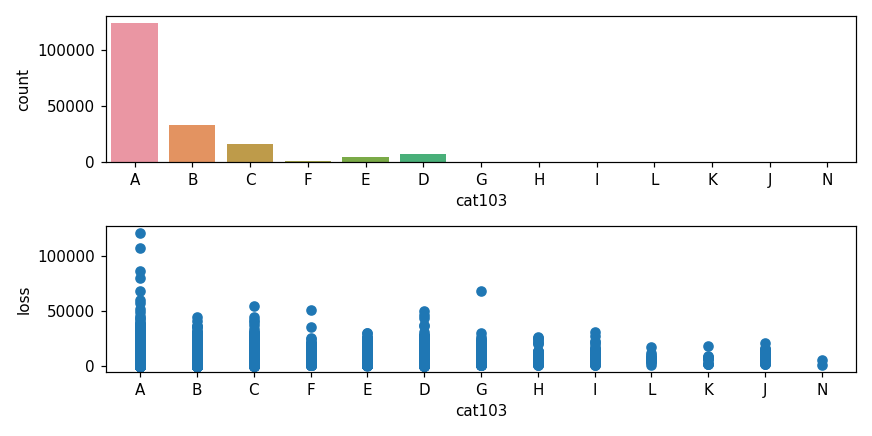

In [188]:
plot_count_scatter_sr(13)

<IPython.core.display.Javascript object>


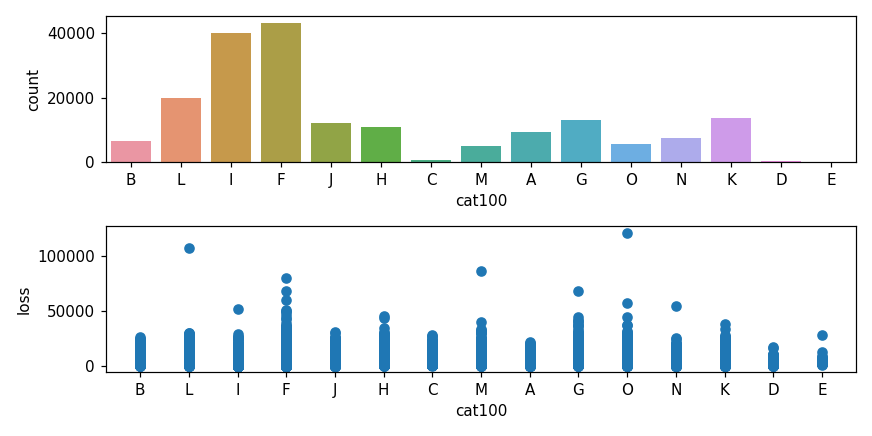

In [189]:
plot_count_scatter_sr(15)

<IPython.core.display.Javascript object>


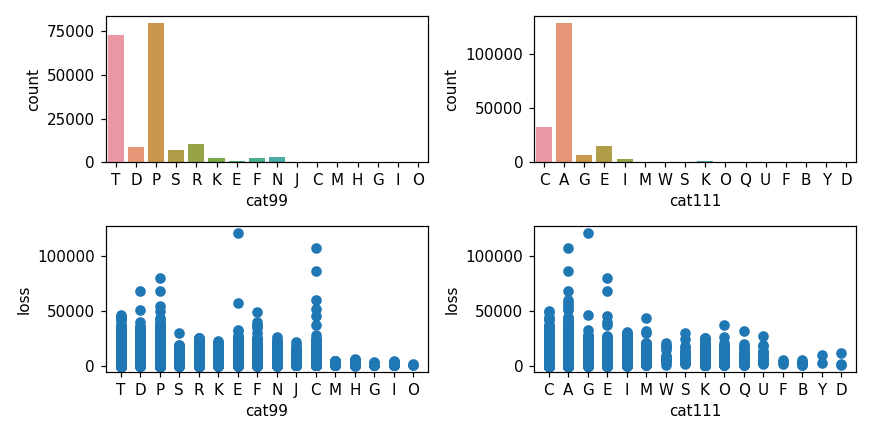

In [190]:
plot_count_scatter_sr(16)

<IPython.core.display.Javascript object>


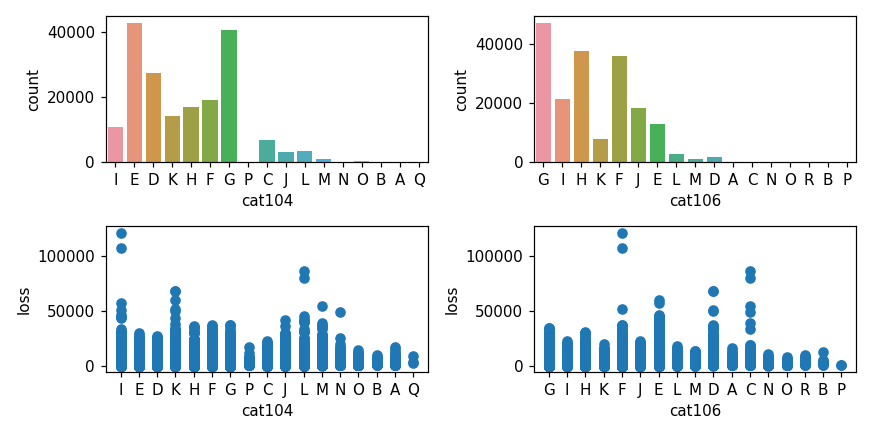

In [191]:
plot_count_scatter_sr(17)

<IPython.core.display.Javascript object>


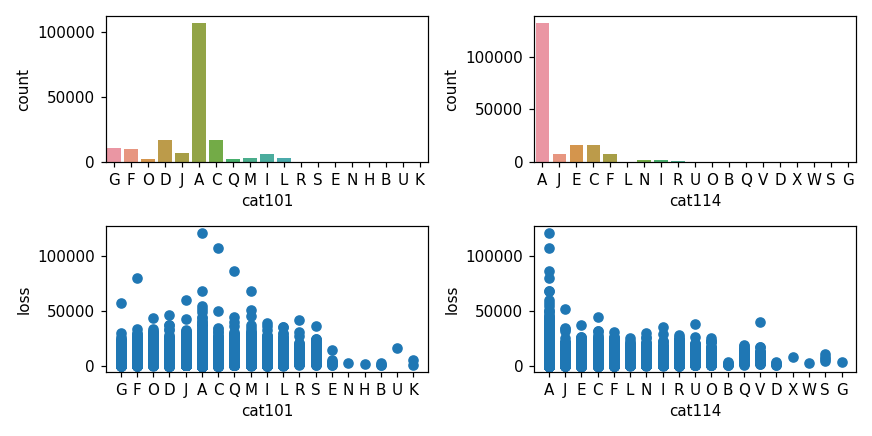

In [192]:
plot_count_scatter_sr(19)

<IPython.core.display.Javascript object>


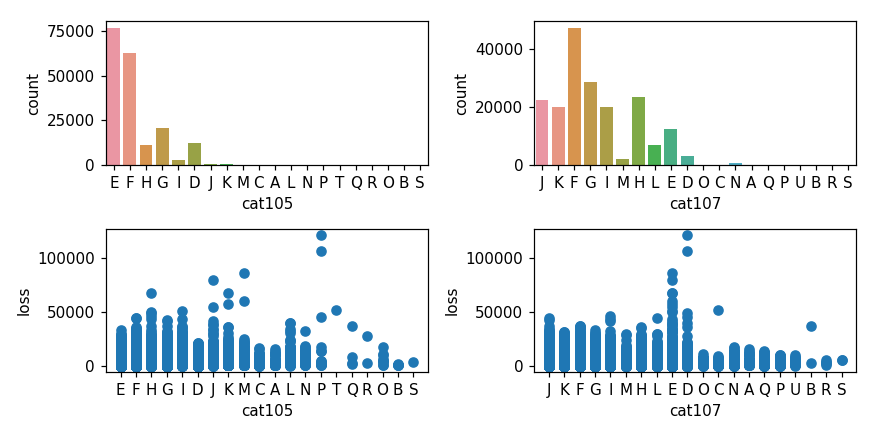

In [193]:
plot_count_scatter_sr(20)

<IPython.core.display.Javascript object>


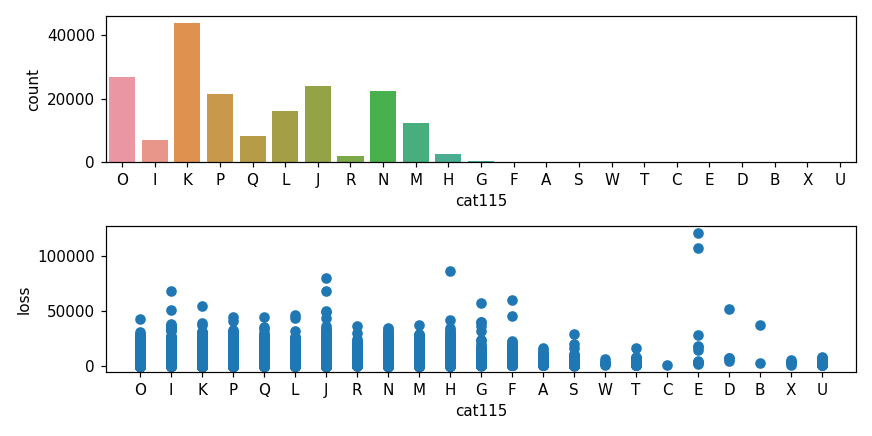

In [194]:
plot_count_scatter_sr(23)

<IPython.core.display.Javascript object>


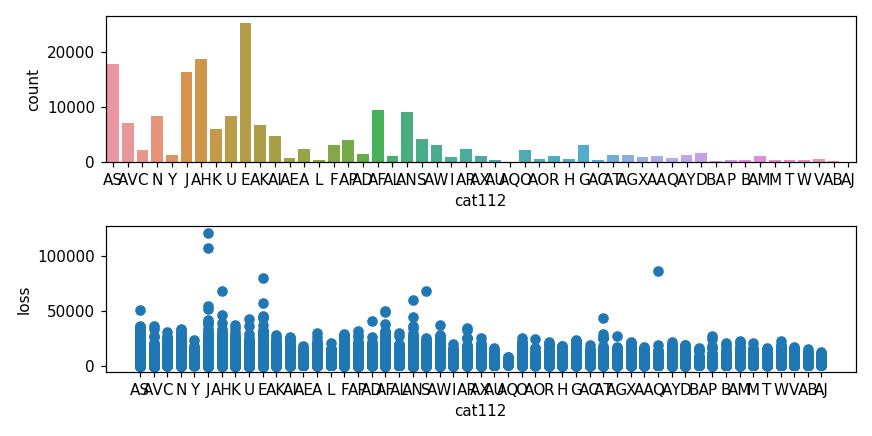

In [195]:
plot_count_scatter_sr(51)

<IPython.core.display.Javascript object>


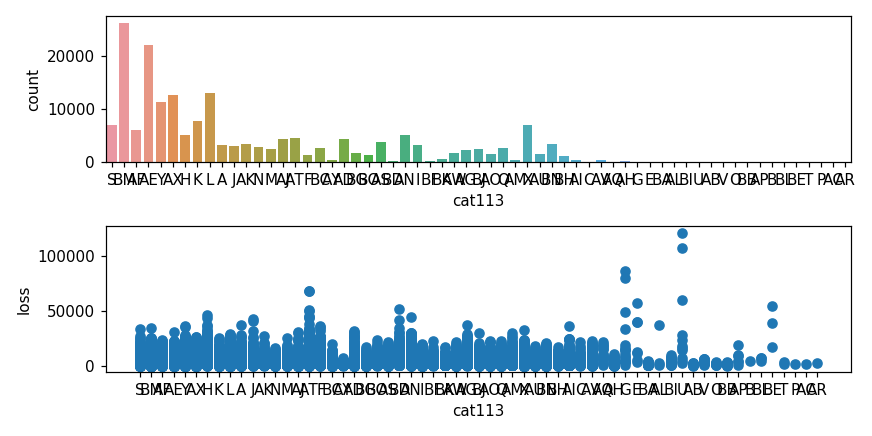

In [196]:
plot_count_scatter_sr(61)

<IPython.core.display.Javascript object>


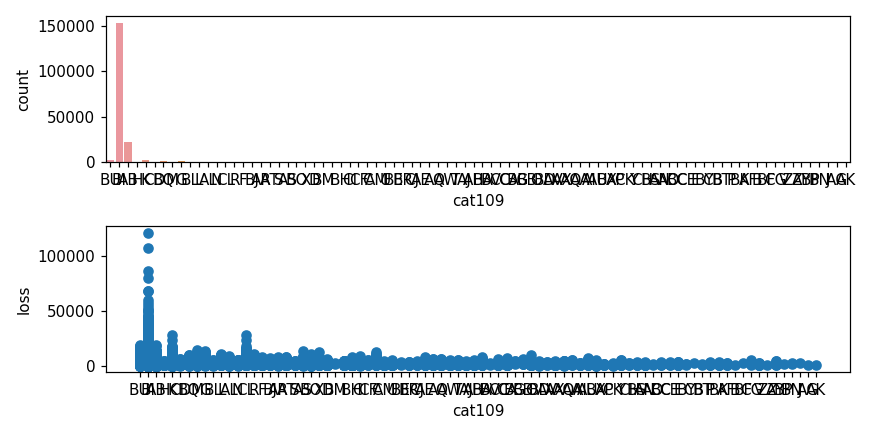

In [197]:
plot_count_scatter_sr(84)

<IPython.core.display.Javascript object>


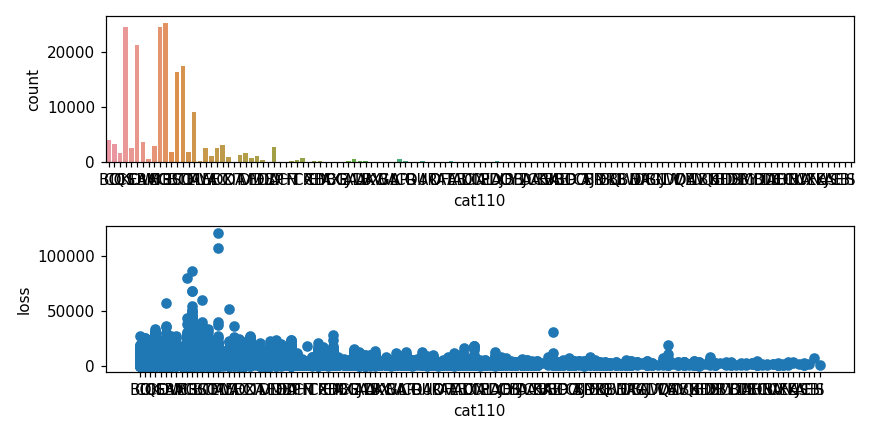

In [198]:
plot_count_scatter_sr(131)

<IPython.core.display.Javascript object>


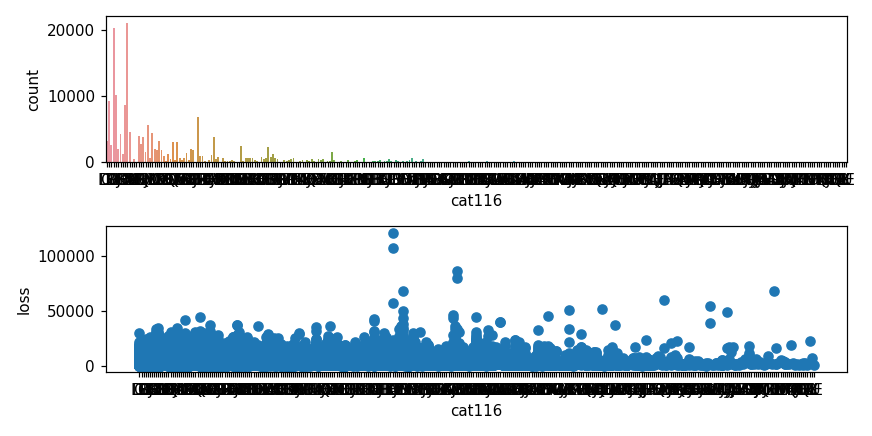

In [199]:
plot_count_scatter_sr(326)